# Exercise 4
### Question 3 
#### (c)

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const 
import astropy.units as u  

In [105]:
def L(mass):
    """ L ∝ M^3.5 """
    return ((mass / const.M_sun.cgs) ** 3.5) * const.L_sun.cgs

def L_temperture(temperature):
    """ L ∝ T^7 """
    return (temperature / 5772) ** 7 * const.L_sun.cgs

def T(luminosity):
    """ L ∝ T^7 """
    return (luminosity / const.L_sun.cgs) ** (1/7) * 5772

def T_age(age):
    """ t_nuc ∝ T^-5 """
    return (10e9 / age) ** (1/5) * 5772

def M(luminosity):
    """ L ∝ M^3.5 """
    return (luminosity / const.L_sun.cgs) ** (1/3.5) * const.M_sun.cgs

print("checking out the validity of the scaling relations:")
print(L(const.M_sun.cgs))
print(L_temperture(5772))
print(T(const.L_sun.cgs))
print(T_age(10e9))
print(M(10e9))

checking out the validity of the scaling relations:
3.828e+33 erg / s
3.828e+33 erg / s
5772.0
5772.0
3.635079643967637e+26 g s(2/7) / erg(2/7)


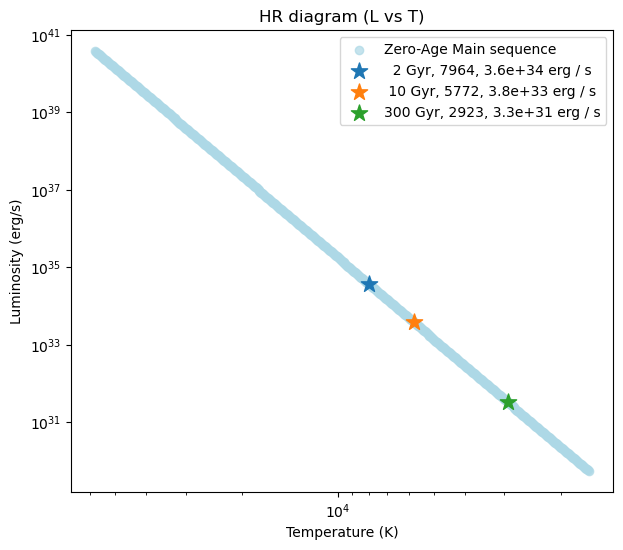

In [110]:
masses = np.logspace(np.log10(0.08*const.M_sun.cgs.value), np.log10(100*const.M_sun.cgs.value), 500)
luminosities = L(masses)
temperatures = T(luminosities)

plt.figure(figsize=(7, 6))
plt.scatter(temperatures, luminosities, color = "lightblue", label="Zero-Age Main sequence", marker='o', alpha=0.7)
plt.yscale("log")
plt.xscale("log")
plt.gca().invert_xaxis()
plt.legend()
plt.xlabel("Temperature (K)")
plt.ylabel("Luminosity (erg/s)")


point_ages = [2e9,10e9,300e9]
for age in point_ages:
    temperature = T_age(age)
    luminosity = L_temperture(temperature)
    plt.scatter(temperature, luminosity, label=f"{age/1e9:3.0f} Gyr, {temperature:.0f}, {luminosity:.1e}", marker='*',s = 150)
plt.legend()
plt.title("HR diagram (L vs T)")
plt.show()